In [1]:
import pathlib

import cv2
import cvlib as cv
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from cvlib.object_detection import draw_bbox
from scipy import signal
from transforms import transforms

IMG_DIR = pathlib.Path("images/")

2024-01-10 10:00:41.250964: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-10 10:00:41.285872: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-10 10:00:41.285910: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-10 10:00:41.286693: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-10 10:00:41.292252: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-10 10:00:41.293436: I tensorflow/core/platform/cpu_feature_guard.cc:1

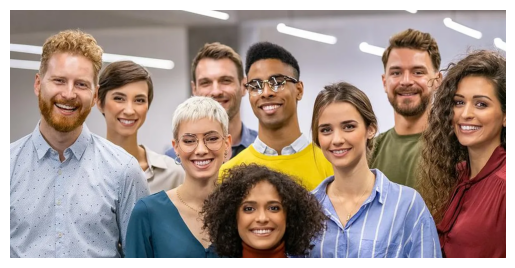

In [2]:
img = cv2.imread(str(IMG_DIR / "people.png"))
plt.imshow(img[..., ::-1])
plt.axis("off")
plt.show()

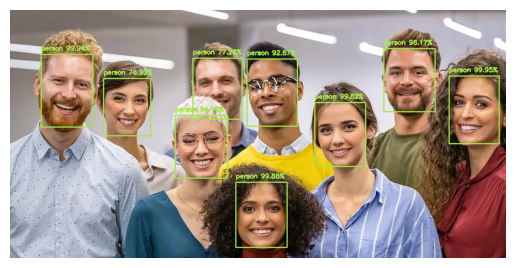

In [3]:
bbox, conf = cv.detect_face(img, threshold=0.5)  # type: ignore
labels = ["person"] * len(bbox)
img2 = draw_bbox(img, bbox, labels, conf, write_conf=True)
plt.imshow(img[..., ::-1])
plt.axis("off")
plt.show()

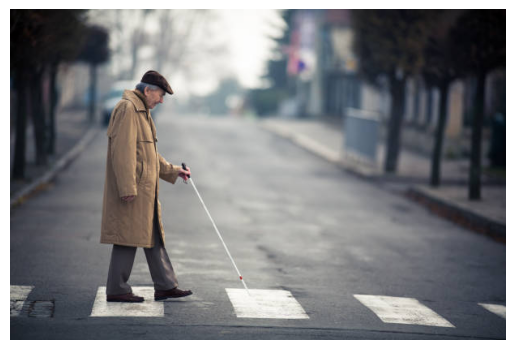

In [4]:
img = cv2.imread(str(IMG_DIR / "old_man.jpg"))
plt.imshow(img[..., ::-1])
plt.axis("off")
plt.show()

In [5]:
bbox, labels, conf = cv.detect_common_objects(img, model="yolov3-tiny", nms_thresh=0.45)
bbox, labels, conf

([[103, 72, 217, 379]], ['person'], [0.7337669134140015])

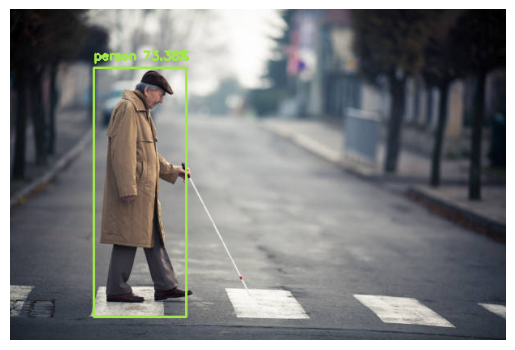

In [6]:
img2 = draw_bbox(img, bbox, labels, conf, write_conf=True)
plt.imshow(img[..., ::-1])
plt.axis("off")
plt.show()